<a href="https://colab.research.google.com/github/ajeeshnadh/DSA_Projects/blob/main/Social_Media_Engagement%2C_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

employee = pd.read_csv("/content/Social Media Engagement Dataset.csv",header=1)

In [17]:
print (employee)

       kcqbs6hxybia  2024-12-09 11:26:15     Monday  Instagram  user_52nwb0a6  \
0      vkmervg4ioos  2024-07-28 19:59:26     Sunday    Twitter  user_ucryct98   
1      memhx4o1x6yu  2024-11-23 14:00:12   Saturday     Reddit  user_7rrev126   
2      bhyo6piijqt9  2024-09-16 04:35:25     Monday    YouTube  user_4mxuq0ax   
3      c9dkiomowakt  2024-09-05 21:03:01   Thursday    Twitter  user_l1vpox2k   
4      e8rzr949rzkr  2024-07-28 03:21:09     Sunday     Reddit  user_jzvf44eq   
...             ...                  ...        ...        ...            ...   
11994  vpqni584supc  2025-01-10 07:55:51     Friday  Instagram  user_ysobum87   
11995  h8rvov0xym5z  2024-12-04 18:50:38  Wednesday     Reddit  user_2jzngfsp   
11996  14zrjm51ea3y  2024-10-24 19:11:24   Thursday   Facebook  user_0sidyfyh   
11997  7bdmnv3rdj8n  2024-11-12 03:07:19    Tuesday     Reddit  user_njyhr041   
11998  28cbflmapxbj  2024-05-15 20:07:23  Wednesday     Reddit  user_gbxy87di   

      Melbourne, Australia 

In [19]:
# Basic info about the dataset
employee.info()

# View first 5 rows
employee.head()

# Summary statistics for numeric columns
employee.describe()

# Check for missing values
employee.isnull().sum()

# Column names
print(employee.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 28 columns):
 #   Column                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                        --------------  -----  
 0   kcqbs6hxybia                                                                                                  11999 non-null  object 
 1   2024-12-09 11:26:15                                                                                           11999 non-null  object 
 2   Monday                                                                                                        11999 non-null  object 
 3   Instagram                                                                                                     11999 non-null  object 
 4   user_52nwb0a6                                       

In [21]:
# Extract text column
text_col = 'Just tried the Chromebook from Google. Best purchase ever. #Food Really interested in hearing your thoughts!'

texts = employee[text_col]

# Example: show random 5 samples
texts.sample(5, random_state=42)

,Just tried the Chromebook from Google. Best purchase ever. #Food Really interested in hearing your thoughts!
1935,My three months review of Toyota Camry: Exceed...
6494,Microsoft LaunchWave is frustrating! Can't wai...
1720,Attended the Toyota NewYearNewYou event yester...
9120,My six months review of Amazon Fire TV: Worth ...
360,Attended the Adidas GlobalCampaign event yeste...


In [24]:
import re

def clean_text(text):
    text = re.sub(r'http\S+', '', text)      # remove URLs
    text = re.sub(r'@\w+', '', text)         # remove mentions
    text = re.sub(r'#\w+', '', text)         # remove hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # remove punctuation/numbers
    text = text.lower().strip()
    return text

employee['clean_text'] = employee[text_col].apply(clean_text)
employee[['clean_text']].head()

,clean_text
0,just saw an ad for microsoft surface laptop du...
1,whats your opinion about nikes epic react ...
2,bummed out with my new diet pepsi from pepsi d...
3,just tried the corolla from toyota absolutely ...
4,nike powerrelease is subpar cant wait to see w...


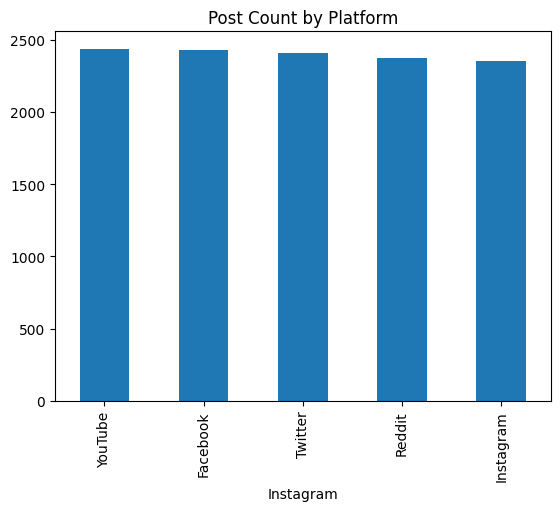

In [26]:
import matplotlib.pyplot as plt

# Platform distribution
employee['Instagram'].value_counts().plot(kind='bar')
plt.title('Post Count by Platform')
plt.show()

In [28]:
import pandas as pd
import re

# 🟢 Assuming your dataframe is already loaded as `employee`
employee.columns = [c.strip().replace(' ', '_') for c in employee.columns]

# Identify the main text column (adjust name as needed)
text_col = 'Just_tried_the_Chromebook_from_Google._Best_purchase_ever._#Food_Really_interested_in_hearing_your_thoughts!'

# Extract hashtags and mentions
employee['hashtags'] = employee[text_col].apply(lambda x: re.findall(r'#\w+', str(x)))
employee['mentions'] = employee[text_col].apply(lambda x: re.findall(r'@\w+', str(x)))

# Clean text for NLP
def clean_text(text):
    text = re.sub(r'http\S+', '', str(text))
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower().strip()
    return text

employee['clean_text'] = employee[text_col].apply(clean_text)

print("✅ Cleaned and extracted hashtags & mentions")
employee[['clean_text', 'hashtags', 'mentions']].head()

✅ Cleaned and extracted hashtags & mentions


,clean_text,hashtags,mentions
0,just saw an ad for microsoft surface laptop du...,"[#MustHave, #Food]",[]
1,whats your opinion about nikes epic react ...,"[#Promo, #Food, #Trending]",[]
2,bummed out with my new diet pepsi from pepsi d...,"[#Reviews, #Sustainable]",[]
3,just tried the corolla from toyota absolutely ...,"[#Health, #Travel]",[]
4,nike powerrelease is subpar cant wait to see w...,[#Discount],[]


In [30]:
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Compute sentiment scores
employee['sentiment_score'] = employee['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Categorize sentiment
def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

employee['sentiment_label'] = employee['sentiment_score'].apply(label_sentiment)

print("✅ Sentiment analysis complete!")
employee[['clean_text', 'sentiment_label', 'sentiment_score']].head()

✅ Sentiment analysis complete!


,clean_text,sentiment_label,sentiment_score
0,just saw an ad for microsoft surface laptop du...,Negative,-0.1695
1,whats your opinion about nikes epic react ...,Positive,0.4576
2,bummed out with my new diet pepsi from pepsi d...,Negative,-0.4767
3,just tried the corolla from toyota absolutely ...,Positive,0.8012
4,nike powerrelease is subpar cant wait to see w...,Positive,0.3182


/tmp/ipython-input-1078299634.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=employee, palette='coolwarm')


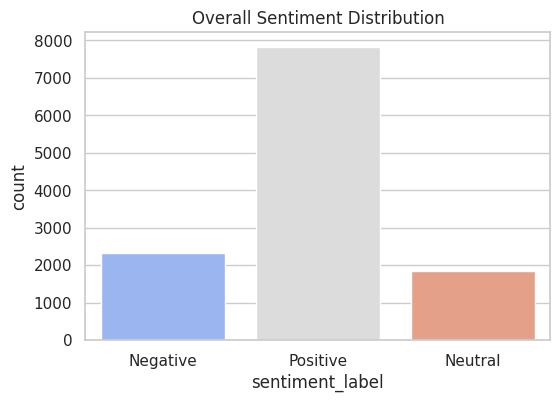

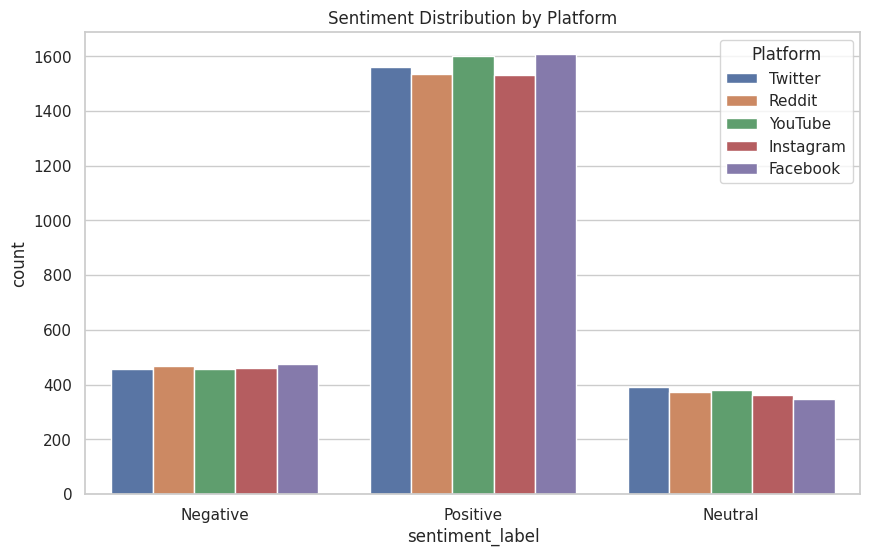

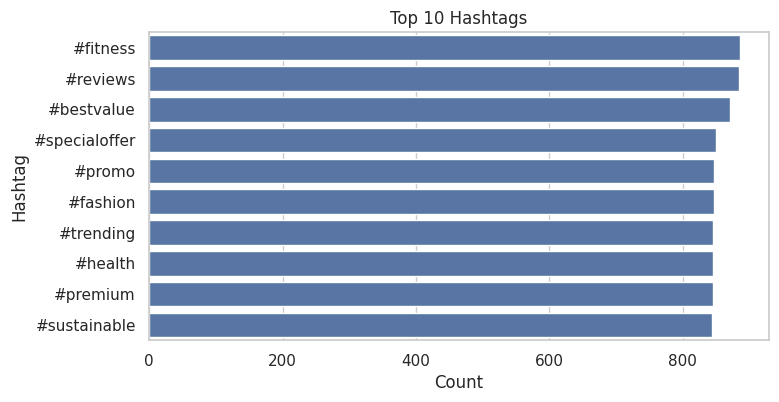

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# 1️⃣ Sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment_label', data=employee, palette='coolwarm')
plt.title('Overall Sentiment Distribution')
plt.show()

# 2️⃣ Sentiment by platform
plt.figure(figsize=(10,6))
sns.countplot(x='sentiment_label', hue='Instagram', data=employee)
plt.title('Sentiment Distribution by Platform')
plt.legend(title='Platform')
plt.show()

# 3️⃣ Top hashtags
from collections import Counter
hashtags_flat = [tag.lower() for tags in employee['hashtags'] for tag in tags]
top_hashtags = Counter(hashtags_flat).most_common(10)
hashtags_df = pd.DataFrame(top_hashtags, columns=['Hashtag', 'Count'])

plt.figure(figsize=(8,4))
sns.barplot(y='Hashtag', x='Count', data=hashtags_df)
plt.title('Top 10 Hashtags')
plt.show()

In [35]:
# Save cleaned dataset to a CSV
employee.to_csv('cleaned_socialmedia_dataset.csv', index=False)
print("💾 Cleaned dataset saved as 'cleaned_socialmedia_dataset.csv'")

# (Optional) Download to your system
from google.colab import files
files.download('cleaned_socialmedia_dataset.csv')

💾 Cleaned dataset saved as 'cleaned_socialmedia_dataset.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

employee = pd.read_csv("/content/cleaned_socialmedia_dataset.csv")

In [37]:
print(employee)

       vkmervg4ioos  2024-07-28 19:59:26     Sunday    Twitter  user_ucryct98  \
0      memhx4o1x6yu  2024-11-23 14:00:12   Saturday     Reddit  user_7rrev126   
1      bhyo6piijqt9  2024-09-16 04:35:25     Monday    YouTube  user_4mxuq0ax   
2      c9dkiomowakt  2024-09-05 21:03:01   Thursday    Twitter  user_l1vpox2k   
3      e8rzr949rzkr  2024-07-28 03:21:09     Sunday     Reddit  user_jzvf44eq   
4      32qywmjy84gk  2024-08-21 17:02:47  Wednesday  Instagram  user_hpr07vl1   
...             ...                  ...        ...        ...            ...   
11993  vpqni584supc  2025-01-10 07:55:51     Friday  Instagram  user_ysobum87   
11994  h8rvov0xym5z  2024-12-04 18:50:38  Wednesday     Reddit  user_2jzngfsp   
11995  14zrjm51ea3y  2024-10-24 19:11:24   Thursday   Facebook  user_0sidyfyh   
11996  7bdmnv3rdj8n  2024-11-12 03:07:19    Tuesday     Reddit  user_njyhr041   
11997  28cbflmapxbj  2024-05-15 20:07:23  Wednesday     Reddit  user_gbxy87di   

             Tokyo, Japan  

In [41]:
print(employee.columns)

Index(['kcqbs6hxybia', '2024-12-09_11:26:15', 'Monday', 'Instagram',
       'user_52nwb0a6', 'Melbourne,_Australia', 'pt',
       'Just_tried_the_Chromebook_from_Google._Best_purchase_ever._#Food_Really_interested_in_hearing_your_thoughts!',
       '#Food', 'Unnamed:_9', 'price,_unique,_traditional,_efficient',
       'Pricing', '0.9826', 'Positive', 'Confused', '0.0376', '1264', '1704',
       '701', '18991', '0.19319', 'Google', 'Chromebook', 'BlackFriday',
       'Launch', '0.0953', '-0.3672', '19.1', 'clean_text', 'hashtags',
       'mentions', 'sentiment_score', 'sentiment_label'],
      dtype='object')


✅ Data loaded: (11999, 33)


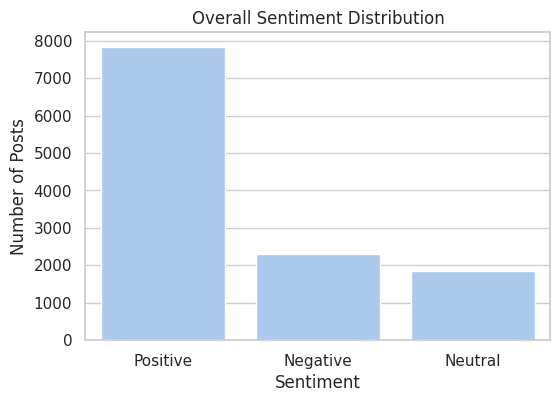

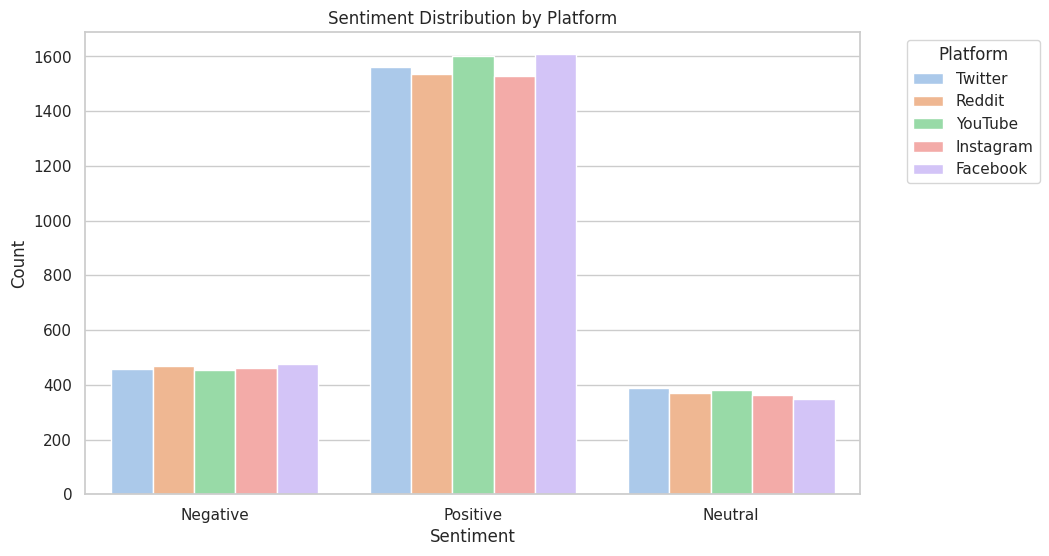

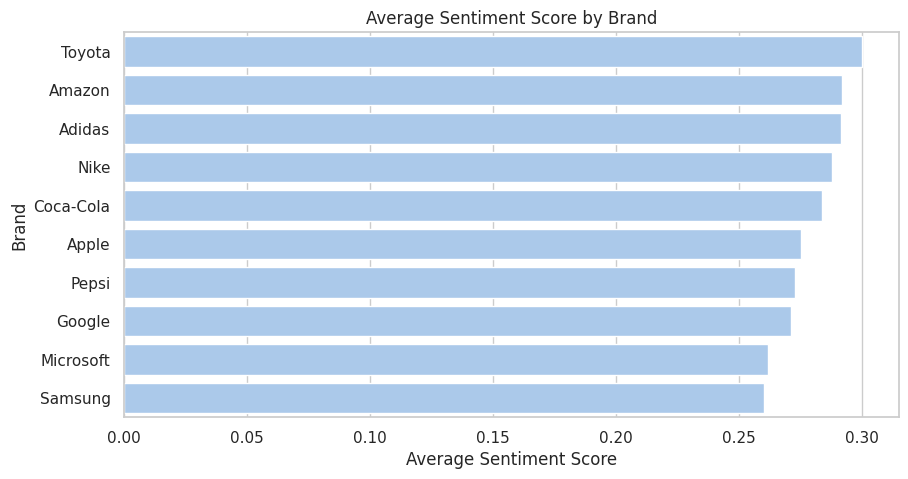

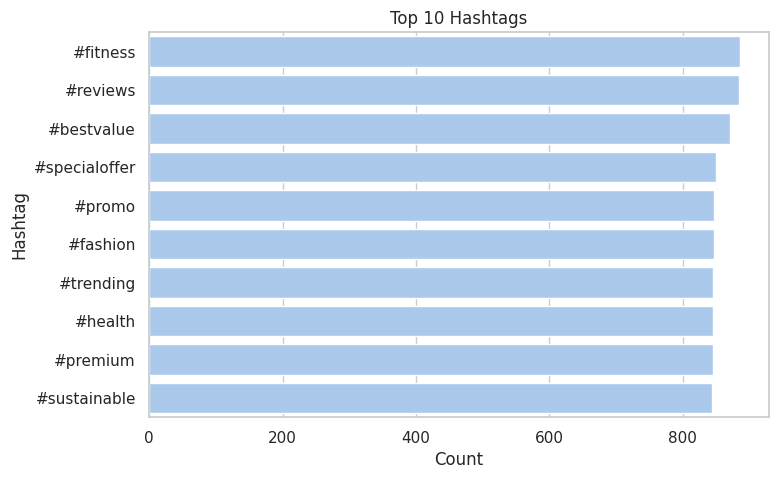

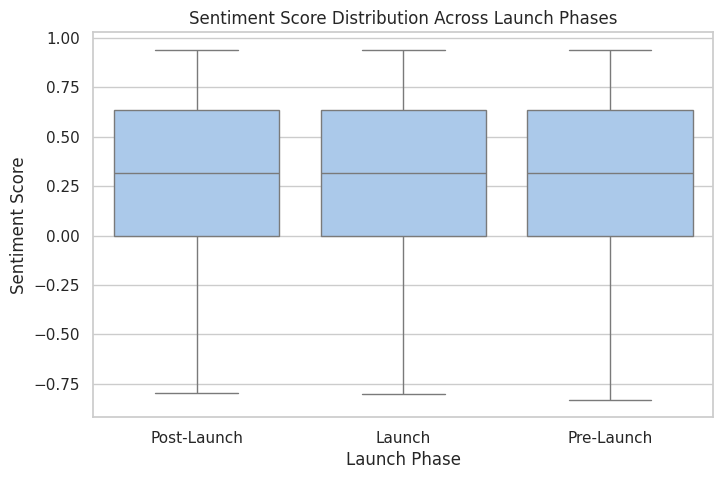

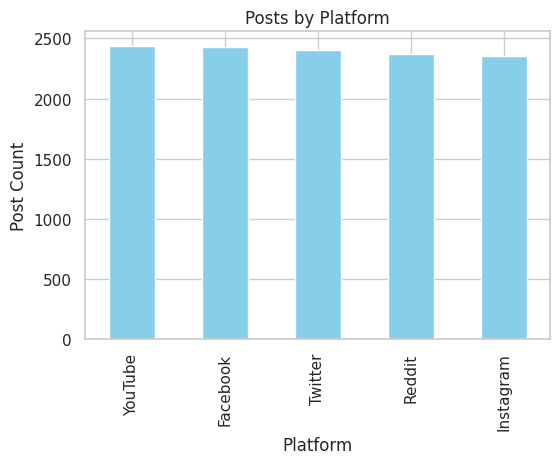

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='pastel')

# Assuming your DataFrame is loaded as `employee`
print("✅ Data loaded:", employee.shape)

# ------------------------------
# 1️⃣ Sentiment Distribution
# ------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment_label', data=employee, order=employee['sentiment_label'].value_counts().index)
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.show()

# ------------------------------
# 2️⃣ Sentiment by Platform
# ------------------------------
plt.figure(figsize=(10,6))
sns.countplot(x='sentiment_label', hue='Instagram', data=employee)
plt.title('Sentiment Distribution by Platform')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# ------------------------------
# 3️⃣ Average Sentiment Score by Brand
# ------------------------------
plt.figure(figsize=(10,5))
brand_sentiment = employee.groupby('Google')['sentiment_score'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=brand_sentiment.values, y=brand_sentiment.index)
plt.title('Average Sentiment Score by Brand')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Brand')
plt.show()

# ------------------------------
# 4️⃣ Top Hashtags Used
# ------------------------------
from collections import Counter
hashtags_flat = [tag.lower() for tags in employee["hashtags"] for tag in eval(str(tags)) if tag]
top_hashtags = Counter(hashtags_flat).most_common(10)
hashtags_df = pd.DataFrame(top_hashtags, columns=['Hashtag', 'Count'])

plt.figure(figsize=(8,5))
sns.barplot(y='Hashtag', x='Count', data=hashtags_df)
plt.title('Top 10 Hashtags')
plt.show()

# ------------------------------
# 5️⃣ Sentiment Trend by Launch Phase
# ------------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x='Launch', y='sentiment_score', data=employee)
plt.title('Sentiment Score Distribution Across Launch Phases')
plt.xlabel('Launch Phase')
plt.ylabel('Sentiment Score')
plt.show()

# ------------------------------
# 6️⃣ Platform Activity Count
# ------------------------------
platform_counts = employee['Instagram'].value_counts()

plt.figure(figsize=(6,4))
platform_counts.plot(kind='bar', color='skyblue')
plt.title('Posts by Platform')
plt.xlabel('Platform')
plt.ylabel('Post Count')
plt.show()

In [46]:
import pandas as pd

# Example: rename numeric columns for clarity (adjust if names differ)
employee = employee.rename(columns={
    '701': 'likes',
    '18991': 'comments',
    '0.19319': 'engagement_ratio'
})

# Calculate total engagement
employee['total_engagement'] = employee['likes'] + employee['comments']

# View summary
print("✅ Engagement columns added")
employee[['likes', 'comments', 'engagement_ratio', 'total_engagement']].head()

✅ Engagement columns added


,likes,comments,engagement_ratio,total_engagement
0,359,52764,0.05086,53123
1,643,8887,0.45425,9530
2,743,6696,0.42293,7439
3,703,47315,0.08773,48018
4,441,7734,0.64908,8175


📈 Total Engagement by Platform:
Instagram
YouTube      124223942
Facebook     122238435
Twitter      120783392
Instagram    118817366
Reddit       117705384
Name: total_engagement, dtype: int64


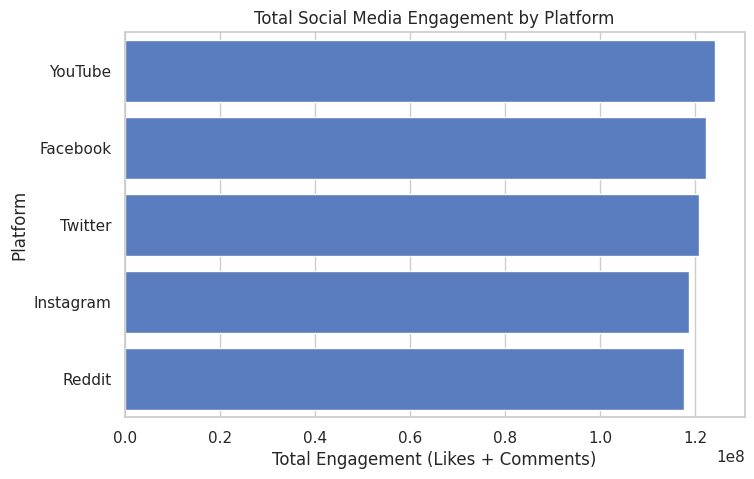

In [48]:
# Group by platform (e.g., Twitter, Reddit, Instagram)
platform_engagement = employee.groupby('Instagram')['total_engagement'].sum().sort_values(ascending=False)

print("📈 Total Engagement by Platform:")
print(platform_engagement)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted')

plt.figure(figsize=(8,5))
sns.barplot(x=platform_engagement.values, y=platform_engagement.index)
plt.title('Total Social Media Engagement by Platform')
plt.xlabel('Total Engagement (Likes + Comments)')
plt.ylabel('Platform')
plt.show()

📈 Total Engagement by Platform:
Instagram
YouTube      124223942
Facebook     122238435
Twitter      120783392
Instagram    118817366
Reddit       117705384
Name: total_engagement, dtype: int64


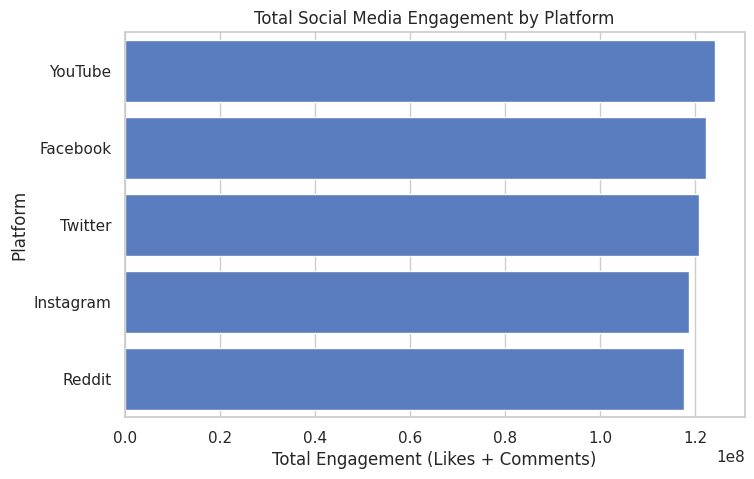

In [50]:
# Group by platform (e.g., Twitter, Reddit, Instagram)
platform_engagement = employee.groupby('Instagram')['total_engagement'].sum().sort_values(ascending=False)

print("📈 Total Engagement by Platform:")
print(platform_engagement)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted')

plt.figure(figsize=(8,5))
sns.barplot(x=platform_engagement.values, y=platform_engagement.index)
plt.title('Total Social Media Engagement by Platform')
plt.xlabel('Total Engagement (Likes + Comments)')
plt.ylabel('Platform')
plt.show()

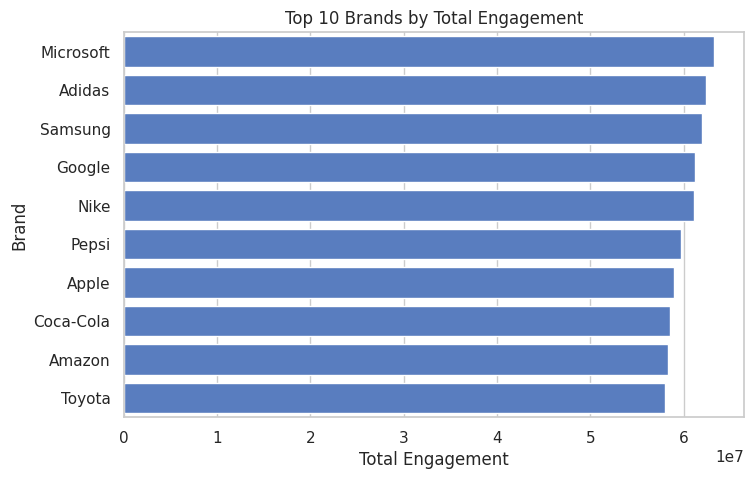

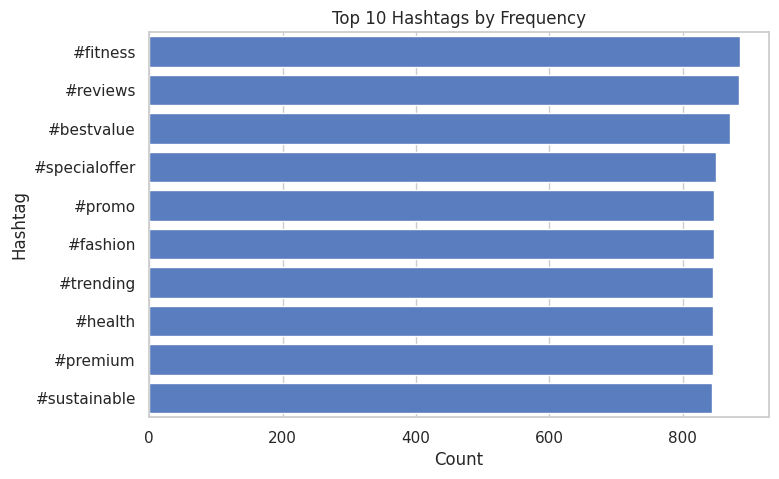

In [52]:
# Top brands by total engagement
brand_engagement = employee.groupby('Google')['total_engagement'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=brand_engagement.values, y=brand_engagement.index)
plt.title('Top 10 Brands by Total Engagement')
plt.xlabel('Total Engagement')
plt.ylabel('Brand')
plt.show()

# Engagement by hashtags (flatten list)
from collections import Counter
hashtags_flat = [tag.lower() for tags in employee["hashtags"] for tag in eval(str(tags)) if tag]
top_hashtags = Counter(hashtags_flat).most_common(10)
hashtags_df = pd.DataFrame(top_hashtags, columns=['Hashtag', 'Count'])

plt.figure(figsize=(8,5))
sns.barplot(x='Count', y='Hashtag', data=hashtags_df)
plt.title('Top 10 Hashtags by Frequency')
plt.show()

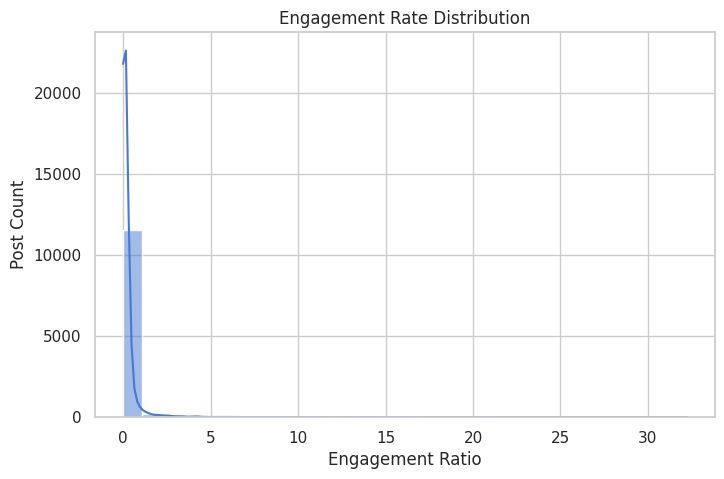

In [54]:
plt.figure(figsize=(8,5))
sns.histplot(employee['engagement_ratio'], bins=30, kde=True)
plt.title('Engagement Rate Distribution')
plt.xlabel('Engagement Ratio')
plt.ylabel('Post Count')
plt.show()

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Sample clean dataset (replace with your actual df)
# employee = pd.read_csv('social_media_cleaned.csv') # The dataframe is already loaded as 'employee'

# Compute total engagement
employee['total_engagement'] = employee['likes'] + employee['comments']

# Select relevant features
features = ['sentiment_score', 'Instagram', 'Google', 'Launch'] # Updated features
target = 'total_engagement'

# Encode categorical columns
le = LabelEncoder()
for col in ['Instagram', 'Google', 'Launch']: # Updated columns to encode
    employee[col] = le.fit_transform(employee[col].astype(str))

# Split dataset
X = employee[features]
y = employee[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Model trained and evaluated:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

✅ Model trained and evaluated:
Mean Absolute Error: 26822.64
R-squared: -0.27


In [57]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predict engagement
y_pred = model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"✅ Model Trained | MAE: {mae:.2f} | R²: {r2:.3f}")


✅ Model Trained | MAE: 26869.54 | R²: -0.271


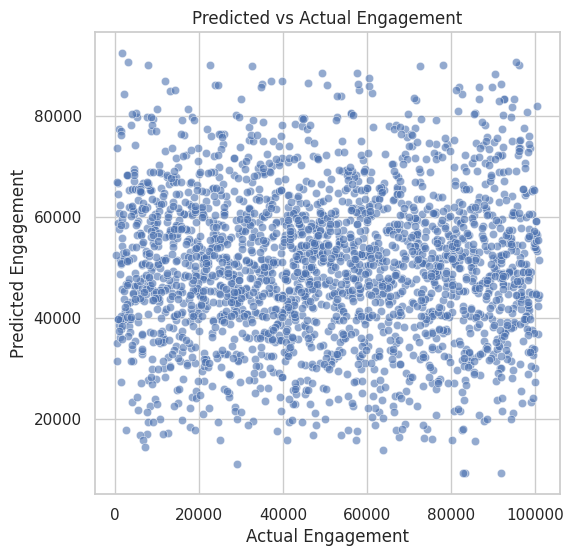

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual Engagement')
plt.ylabel('Predicted Engagement')
plt.title('Predicted vs Actual Engagement')
plt.show()


In [60]:
# Create new dataframe with predictions
employee['predicted_engagement'] = model.predict(employee[features])

# Display top users/posts by predicted engagement
df_sorted = employee[['Instagram', 'Google', 'total_engagement', 'predicted_engagement']].head(10)
display(df_sorted)

,Instagram,Google,total_engagement,predicted_engagement
0,3,5,53123,72923.780933
1,2,6,9530,51311.132483
2,4,7,7439,50352.175498
3,3,9,48018,62541.015833
4,2,6,8175,45154.361848
5,1,7,25516,25021.386667
6,2,3,57436,60920.937762
7,2,3,86289,55295.436214
8,4,4,62392,44481.245202
9,4,1,98307,37330.045062


In [62]:
employee.to_csv('predicted_social_media_engagement.csv', index=False)
print("💾 Saved: predicted_social_media_engagement.csv")

💾 Saved: predicted_social_media_engagement.csv
